In [1]:
import numpy as np
from scipy.stats import norm, kurtosis
import pandas as pd
from sklearn import svm
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import csv
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline



#Read train dataset
def read_sat_train_file(filenames=["./sat_train.csv"]):
    x = []
    y = []
     #iterate over all configurations
    

    for filename in filenames:
        with open(filename) as file:
            reader = csv.reader(file)
            class_names = next(reader)[30:]
            for row in reader:
                x.append(list(map(float,row[:-1])))
                y.append(int(row[-1]))
            
    return x, y

x_train,y_train=read_sat_train_file()

print("Hi")

Hi


In [2]:
#Read test data set
def read_sat_test_file(filenames=["./sat_test.csv"]):
    xx = []
    yy = []
     #iterate over all configurations
    

    for filename in filenames:
        with open(filename) as file:
            reader = csv.reader(file)
            class_names = next(reader)[30:]
            for row in reader:
                xx.append(list(map(float,row[:-1])))
                yy.append(int(row[-1]))
            
    return xx, yy

x_test,y_test=read_sat_test_file()


In [ ]:
#Search best fit parameters for the train data set
from sklearn.model_selection import GridSearchCV
from sklearn import svm


#set up parameters to iterate over
parameters = {'kernel':('linear', 'rbf'),
                'C':[0.0001, 0.001, 0.01, 0.1, 1],
                'gamma':[0.0001, 0.001, 0.01, 0.1, 1]
              }

clf = GridSearchCV(svm.SVC(), parameters)

from sklearn.preprocessing import MultiLabelBinarizer  

clf.fit(x_train, y_train) #iterate over all configurations

print("Best parameters:", clf.best_params_)


In [19]:
#Fit the train dataset with the best parameters.
svm = SVC(C=1, kernel='rbf', gamma=0.0001)

svm.fit(x_train,y_train)
accuracy = svm.score(x_train, y_train)
print('Model accuracy:',accuracy*100,'%')

Model accuracy: 91.31709517365809 %


In [20]:
yhat_train=svm.predict(x_train)

In [21]:
#Predict using the SVM model on test dataset
yhat = svm.predict(x_test)


In [22]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("SVM accuracy on test data set: ", metrics.accuracy_score(y_test, yhat))

SVM accuracy on test data set:  0.8975


In [23]:
#compare set of predicted labels to the corresponding set of labels in y_test using Jaccard index.
from sklearn.metrics import jaccard_similarity_score
print("Jaccard similarity accuracy score on test data set: ",jaccard_similarity_score(y_test, yhat))

Jaccard similarity accuracy score on test data set:  0.8975


In [24]:
print("Jaccard similarity accuracy score out of 2000 data records: ",jaccard_similarity_score(y_test, yhat,normalize=False))

Jaccard similarity accuracy score out of 2000 data records:  1795


In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             precision    recall  f1-score   support

          1       0.98      0.99      0.98      1072
          2       0.98      0.99      0.99       479
          3       0.88      0.98      0.93       960
          4       0.72      0.57      0.64       415
          5       0.94      0.89      0.91       470
          7       0.90      0.89      0.89      1038

avg / total       0.91      0.91      0.91      4434

Normalized confusion matrix
[[9.89e-01 0.00e+00 9.33e-03 0.00e+00 1.87e-03 0.00e+00]
 [0.00e+00 9.87e-01 0.00e+00 4.18e-03 6.26e-03 2.09e-03]
 [3.13e-03 1.04e-03 9.80e-01 1.46e-02 0.00e+00 1.04e-03]
 [7.23e-03 4.82e-03 2.34e-01 5.71e-01 9.64e-03 1.73e-01]
 [3.40e-02 8.51e-03 2.13e-03 2.13e-03 8.89e-01 6.38e-02]
 [0.00e+00 9.63e-04 2.12e-02 7.42e-02 1.73e-02 8.86e-01]]


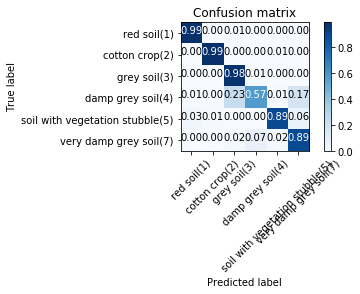

In [27]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, yhat_train, labels=[1,2,3,4,5,7])
np.set_printoptions(precision=2)

print (classification_report(y_train, yhat_train))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['red soil(1)','cotton crop(2)','grey soil(3)','damp grey soil(4)','soil with vegetation stubble(5)','very damp grey soil(7)'],normalize= True,  title='Confusion matrix')